In [1]:
# Import libraries

import cv2
from matplotlib import pyplot as plt
from copy import deepcopy
from scipy.ndimage import maximum_filter
from tqdm import tqdm
import numpy as np
import copy

In [2]:
# Image address

img1_ad = "/home/deveshdatwani/Stitching/Phase1/Data/Train/image_one.jpg"
img2_ad = "/home/deveshdatwani/Stitching/Phase1/Data/Train/image_two.jpg"

In [14]:
# Reading images

IMG1 = cv2.resize(cv2.imread(img1_ad, 0), (500,500))
IMG2 = cv2.resize(cv2.imread(img2_ad, 0), (500,500))

In [4]:
# Carrying out corner detection

dst1 = cv2.cornerHarris(IMG1, 10, 1, 0.02)
dst2 = cv2.cornerHarris(IMG2, 10, 1, 0.02)

dst1 = cv2.dilate(dst1, None)
dst2 = cv2.dilate(dst2, None)

In [5]:
# Adaptive Non-Maximal Suppression (ANMS)

def ANMS(image, distImg, MBEST=100):
    imageCopy = deepcopy(image)
    localMaximas = maximum_filter(distImg, size=20)
    mask = (distImg == localMaximas)
    mask2 = (distImg > 0)
    finMask = np.logical_and(mask, mask2)
    indices = np.argwhere(finMask==True)
    R  = float('inf') * np.ones((indices.shape[0]))
    ED = float('inf')
    
    for i in tqdm(range(len(R)), total=len(R)):
        for j in range(len(R)):
            xi, yi = indices[i]
            xj, yj = indices[j]
            
            if dst1[xi, yi] < dst1[xj, yj]:
                ED = (xi-xj)**2 +(yi-yj)**2
            if ED < R[i]:
                R[i] = ED
    
    tempR = np.argsort(-R)
    
    return indices[tempR[:MBEST]]

def ANMS2(originalImage, probabilityScores, points):
    tempImg=copy.deepcopy(originalImage)
    localMaximas = maximum_filter(probabilityScores,size=20)
    newMask=(probabilityScores==localMaximas)   #create a mask whereever probability scores are equal to local maximas
    tempMask=(probabilityScores>0)              # to avoid the masks where all elements have 0 probability
    newMask=np.logical_and(newMask,tempMask)    # we want both conditions to be true, so using logical AND
    indexes=np.argwhere(newMask==True)
    # print(indexes)
    nStrong=indexes.shape[0]
    R = float('inf')* np.ones((nStrong,))
    ED = 0

    for i in tqdm(range(nStrong), total=nStrong):
        for j in range(nStrong):
            xi = indexes[i][0]
            yi = indexes[i][1]
            xj = indexes[j][0]
            yj = indexes[j][1]
            if probabilityScores[xj,yj] > probabilityScores[xi,yi]:
                ED = (xi-xj)**2 +(yi-yj)**2
            if ED < R[i]:
                R[i] = ED
    tempR = np.argsort(-R)
    bestPoints = indexes[tempR[:points]]
    
    return bestPoints

In [6]:
# Visualize best points with non-solid cicrles

def visualizeBestPoints(img1, maxPoints):
    for x,y in maxPoints:
        x_i=y
        y_i=x
        cv2.circle(img1,(x_i, y_i),2,(0,255,0),-1)
    
    return None

100%|██████████████████████████████████████| 2333/2333 [00:07<00:00, 304.48it/s]


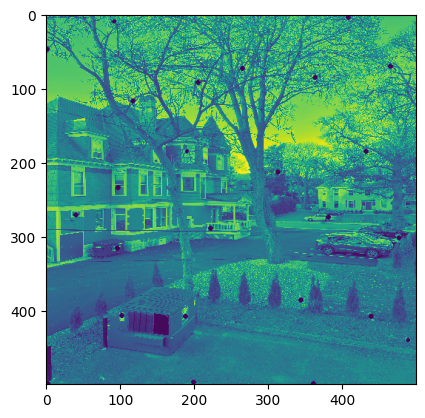

In [15]:
maxPointsOne = ANMS2(IMG1, dst1, 200)
visualizeBestPoints(IMG1, maxPointsOne)
plt.imshow(IMG1)

100%|██████████████████████████████████████| 2222/2222 [00:06<00:00, 320.15it/s]


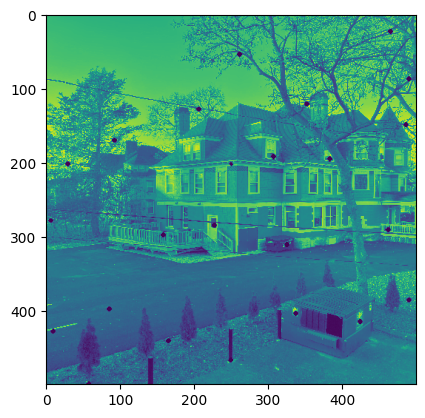

In [16]:
maxPointsTwo = ANMS2(IMG2, dst2, 200)
visualizeBestPoints(IMG2, maxPointsTwo)
plt.imshow(IMG2)

In [9]:
# Extract features from neighboring pixels of corners 

def extractFeatures(bestPoints, image):
    paddedImage = np.pad(image, 20)
    features = []
    Xx = 40
    Yy = 40 
    for eachPoint in bestPoints:
        x, y = eachPoint
        imagePatch = paddedImage[x:x+Xx, y:y+Yy]
        bluredPatch = cv2.GaussianBlur(imagePatch, (3,3), cv2.BORDER_DEFAULT)
        subsamplePatch = bluredPatch[::5,::5]
        oneFeature = np.reshape(subsamplePatch, (64,1))
        features.append(oneFeature)
    
    features = np.array(features)
    (features - features.mean()) / features.std() 
    
    return features

In [10]:
# Match features from two images

def matchFeatures(featuresFromImage1, featuresFromImage2, THRESHOLD=0.9):
    matchFeatures = []
    
    for i, feature1 in enumerate(featuresFromImage1):
        smallest = float('inf')
        second_smallest = float('inf')
        best_match = 0
        for j, feature2 in enumerate(featuresFromImage2):
            distance = np.sqrt(sum((feature1 - feature2) ** 2))
            if distance < smallest:
                smallest = distance
                best_match = j
            elif distance < second_smallest:
                second_smallest = distance
            if (smallest) / (second_smallest) < THRESHOLD:
                matchFeatures.append((i, best_match))
            else:
                pass
    
    return matchFeatures

In [11]:
# RANSAC algorithm

def RANSAC():
    
    return None

In [12]:
# Stich images
    
def stitchImages(img1, img2):
    
    return None

In [13]:
# Run algorithm

bestPoints1 = ANMS(img1, dst1)
bestPoints2 = ANMS(img2, dst2)

featuresFromImage1 = extractFeatures(bestPoints1, img1)
featuresFromImage2 = extractFeatures(bestPoints2, img2)

NameError: name 'img1' is not defined

In [17]:
array = np.array([1,3,45,24,1,5])

In [19]:
array[0,0]

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed